In [1]:
#imports
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

In [2]:
#load dataset into object
groups = fetch_20newsgroups()

c:\Users\SUKHMAN\Desktop\Coding\ml projects\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


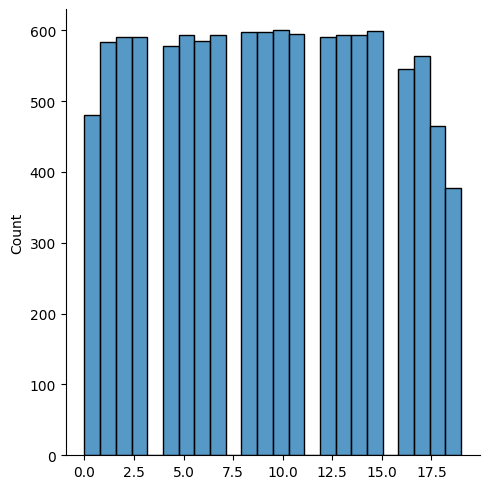

In [3]:
#plot the distribution of the different newsgroups to get a sense of the data
sns.displot(groups['target'])
plt.show()

In [4]:
#getting unigram counts
cv = CountVectorizer(stop_words='english',max_features=500)
transformed = cv.fit_transform(groups['data'])

In [5]:
'''there are 11314 sentences and there are 500 columns representing whether that word belongs
to that sentence or not'''
transformed.toarray().shape

(11314, 500)

c:\Users\SUKHMAN\Desktop\Coding\ml projects\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


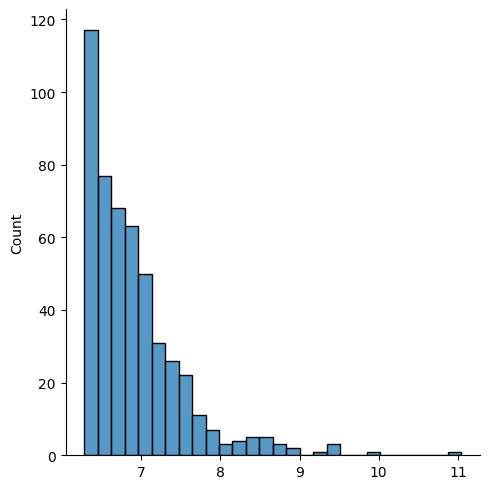

In [6]:
#graph that shows the 500 highest word counts
sns.displot(np.log(transformed.toarray().sum(axis=0)))
plt.show()

In [7]:
print(cv.get_feature_names_out())

['00' '000' '0d' '0t' '10' '100' '11' '12' '13' '14' '145' '15' '16' '17'
 '18' '19' '1993' '1d9' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '34u' '35' '40' '45' '50' '55' '80' '92' '93'
 '__' '___' 'a86' 'able' 'ac' 'access' 'actually' 'address' 'ago' 'agree'
 'al' 'american' 'andrew' 'answer' 'anybody' 'apple' 'application' 'apr'
 'april' 'area' 'argument' 'armenian' 'armenians' 'article' 'ask' 'asked'
 'att' 'au' 'available' 'away' 'ax' 'b8f' 'bad' 'based' 'believe'
 'berkeley' 'best' 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board'
 'body' 'book' 'box' 'buy' 'ca' 'california' 'called' 'came' 'canada'
 'car' 'card' 'care' 'case' 'cause' 'cc' 'center' 'certain' 'certainly'
 'change' 'check' 'children' 'chip' 'christ' 'christian' 'christians'
 'church' 'city' 'claim' 'clinton' 'clipper' 'cmu' 'code' 'college'
 'color' 'colorado' 'columbia' 'com' 'come' 'comes' 'company' 'computer'
 'consider' 'contact' 'control' 'copy' 'correct' 'cost' 'country' 'co

In [8]:
#util functions
def letters_only(word):
    return word.isalpha()
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

In [9]:
#preprocessing the data to remove wasteful words, common names and lemmatizing the data
for post in groups['data']:
    cleaned.append(' '.join([lemmatizer.lemmatize(word.lower()) for word in post.split(' ') if letters_only(word) and word not in all_names]))

In [10]:
transformed = cv.fit_transform(cleaned)

In [11]:
print(cv.get_feature_names_out())

['able' 'accept' 'access' 'according' 'act' 'action' 'actually' 'add'
 'address' 'ago' 'agree' 'algorithm' 'allow' 'american' 'anonymous'
 'answer' 'anybody' 'apple' 'application' 'apr' 'arab' 'area' 'argument'
 'armenian' 'article' 'ask' 'asked' 'assume' 'atheist' 'attack' 'attempt'
 'available' 'away' 'bad' 'based' 'belief' 'believe' 'best' 'better'
 'bible' 'big' 'bike' 'bit' 'black' 'board' 'body' 'book' 'box' 'build'
 'building' 'built' 'bus' 'buy' 'ca' 'called' 'came' 'car' 'card' 'care'
 'carry' 'case' 'cause' 'center' 'certain' 'certainly' 'chance' 'change'
 'check' 'child' 'chip' 'christian' 'church' 'city' 'claim' 'clear'
 'clipper' 'close' 'code' 'color' 'come' 'coming' 'command' 'comment'
 'common' 'communication' 'company' 'computer' 'computing' 'consider'
 'considered' 'contact' 'control' 'copy' 'correct' 'cost' 'country'
 'couple' 'course' 'court' 'cover' 'create' 'crime' 'current' 'cut' 'data'
 'day' 'deal' 'death' 'department' 'device' 'did' 'difference' 'different'
 '

In [12]:
#k-means clustering on the tranformed data
km = KMeans(n_clusters=20)
km.fit(transformed)
labels = groups.target

c:\Users\SUKHMAN\Desktop\Coding\ml projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
print(km.labels_)

[6 1 6 ... 1 1 1]


Text(0, 0.5, 'Cluster')

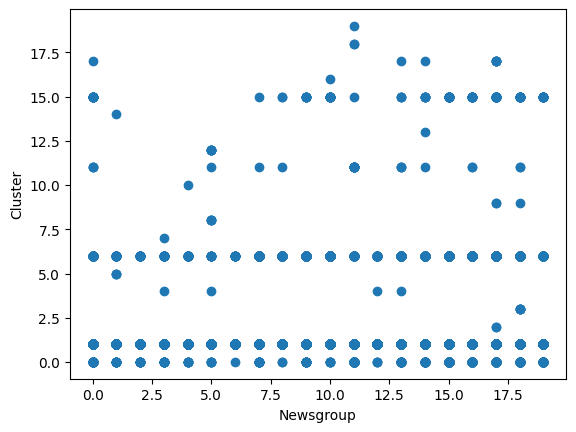

In [14]:
#shows how many examples of lets say group 0 the clustering assigned to group 0 or 2 or so on 
plt.scatter(labels, km.labels_)
plt.xlabel('Newsgroup')
plt.ylabel('Cluster')

In [15]:
#non negative matrix factorization for topic modeling
nmf = NMF(n_components=100, random_state=43).fit(transformed)

c:\Users\SUKHMAN\Desktop\Coding\ml projects\venv\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [16]:
for topic_idx, topic in enumerate(nmf.components_):
    label = '{}:'.format(topic_idx)
    print(label, ' '.join([cv.get_feature_names_out()[i]for i in topic.argsort()[:-9:-1]]))

0: wa went came told took started woman saw
1: image file color free version available better program
2: file output line entry write program open return
3: disk hard support card drive board high apr
4: entry program file rule info number use source
5: hockey league game team division player play san
6: ha given called able taken possible exactly far
7: want let help life copy sort live trying
8: gun control crime united american weapon second death
9: launch space service communication sale technology small data
10: space nasa national earth science international center radio
11: turkish government sent took american world armenian war
12: file change set server command control value ftp
13: believe belief truth claim evidence hell different christian
14: read claim post discussion reading far posting issue
15: encryption technology protect policy access device security key
16: use using note similar le usually code provide
17: widget application value set type return event code
18: 